
# YZV-211E Introduction to Data Science and Engineering


## Homework 4: Building and Evaluating Machine Learning Models

**Fall 2022**<br>
**Instructor:** *Asst. Prof. Dr. Faik Boray TEK* <br>
**Reach out to TA Erhan Bicer for any of your questions (bicer21@itu.edu.tr)**

---



In this assignment, you will be practicing:
* Regression
* Classification
* Clustering
* Evaluating ML models

**Before diving into solving assignment**:
* Use random_state parameter as 0 if the parameter exists to avoid different solutions if the code is re-executed.
* You can add cells within the headers for your code.
* Prefarably, use models within the sklearn. 
* Write your name, surname and student number in the below markdown.
* This is the last homework before the project, thanks for your efforts so far. Keep up the good work, the semester is almost done :)


In [1159]:
import numpy as np
np.random.seed(42) # meaning of life: 42

### Submitted by:
Mustafa Bayrak,150210339

### Import necessary packages

Import packages that you are going to use, do not remove already existing ones.

In [1160]:
%pip install palmerpenguins

Note: you may need to restart the kernel to use updated packages.


In [1161]:
###
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve,roc_auc_score
from palmerpenguins import load_penguins
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

## Regression

*Recall: In regression task, aim is to make predictions on continous values (e.g. predicting expected income in next month for a company)*

A NASA dataset about average temperature is given. In the dataset, annual difference in average global temperature is given. Your task is to use the data between **1880 and 2010 (inclusive) to train your model** and **make predictions for upcoming years after 2010 (2011-2021)**. **Evaluate your model with actual annual difference for these years**.

Here, the csv is read and the first elements of the dataset are shown.

In [1162]:
df = pd.read_csv("nasa-temperature.txt",sep=",",index_col=0)
df.head()

,Year,Difference
0,1880,-0.16
1,1881,-0.07
2,1882,-0.10
3,1883,-0.17
4,1884,-0.28


### Training-Test Split

Since this is a temporal (time-based) dataset, training-test split should be done carefully. Aim is to use historical data to predict annual difference in upcoming years.
* Use the data between **1880 and 2010 (inclusive) as training set**
* **test set consist of samples after 2010 (2011-2021)**.

The test and train sets were split according to the 'Year' column.

In [1163]:
train_set_X = np.array(df[df['Year'] <= 2010]['Year']).reshape(-1,1)
train_set_y = df[df['Year'] <= 2010]['Difference']
test_set_X = np.array(df[df['Year'] >2010]['Year']).reshape(-1,1)
test_set_y = df[df['Year'] >2010]['Difference']

### Apply simple linear regression

* Apply simple linear regression
* Plot the actual values and predictions (plot both train and test predictions together for complete view).
* Using appropriate metrics (at least 2), report how well your regression line fit to both training data and testing data.

Linear regression was applied and predictions were obtained.

In [1164]:
lin_reg = LinearRegression()
lin_reg.fit(train_set_X,train_set_y)
# Make prediction on training set
train_predict = lin_reg.predict(train_set_X)
# Make prediction on testing set
test_predict = lin_reg.predict(test_set_X)

Plot the actual values and predictions

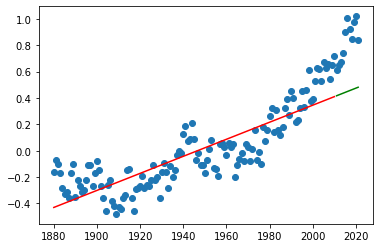

In [1165]:
# Plot actual values
plt.plot(df["Year"],df["Difference"],'o')
# plot train set and prediction
plt.plot(train_set_X,train_predict,'r')
# plot test set and prediction
plt.plot(test_set_X,test_predict,'g')

According to these metrics, regression line does not fit testing data well.

In [1166]:
#compute mean squared error
mean_squared_error_test = metrics.mean_squared_error(test_set_y,test_predict)
#compute mean absolute error
mean_absolute_error_test = metrics.mean_absolute_error(test_set_y,test_predict)
print("Mean Squared error test=",mean_squared_error_test)
print("Mean absolute error test=",mean_absolute_error_test)

Mean Squared error test= 0.16525922756777783
Mean absolute error test= 0.3865634441893992


According to these metrics, regression line does not fit training data so well but better than testing data.

In [1167]:
#compute mean squared error
mean_squared_error_train = metrics.mean_squared_error(train_set_y,train_predict)
# compute mean absolute error
mean_absolute_error_train = metrics.mean_absolute_error(train_set_y,train_predict)
print("Mean Squared error train=",mean_squared_error_train)
print("Mean absolute error train=",mean_absolute_error_train)

Mean Squared error train= 0.023846435876925372
Mean absolute error train= 0.12842182245235678


### Polynomial Regression

* Apply polynomial regression. Decide on optimal degree.
* Plot the actual values and predictions (plot both train and test predictions together for complete view).
* Using appropriate metrics (at least 2), report how well your regression line fit to both training data and testing data.
* Answer Question 1.

Optimal degree in the range from 1 to 40 is 31.

In [1168]:
best_score = 0
optimal_degree = 1
# Find optimal degree by iterating between 1-40
for i in range(1,40):
    lin_model= LinearRegression()
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(train_set_X)
    lin_model.fit(x_poly, train_set_y)
    pred = lin_model.predict(x_poly)
    score = lin_model.score(x_poly,train_set_y)
    if score > best_score:
        optimal_degree= i
        best_score = score
print("Optimal degree:",optimal_degree)

Optimal degree: 31


Polynomial regression with optimal degree.

In [1169]:
lin_model= LinearRegression()
# Apply polynomial regression with optimal degree
poly = PolynomialFeatures(degree=optimal_degree)

Fit models

In [1170]:
# Fit models
X_train_poly = poly.fit_transform(train_set_X)
X_test_poly = poly.fit_transform(test_set_X)
lin_model.fit(X_train_poly, train_set_y)

LinearRegression()

Make predictions.

In [1171]:
# Make prediction
y_train_pred_poly = lin_model.predict(X_train_poly)
y_test_pred_poly = lin_model.predict(X_test_poly)

Plot the actual values and predictions

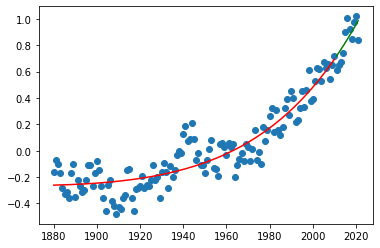

In [1172]:
# Plot actual values
plt.plot(df["Year"],df["Difference"],'o')
# Plot train set and prediction
plt.plot(train_set_X,y_train_pred_poly,'r')
# Plot test set and prediction
plt.plot(test_set_X,y_test_pred_poly,'g')

According to these metrics, regression line does fits testing data well (better than linear reg. line).

In [1173]:
# Compute mean squared error
mean_squared_error_test_poly = metrics.mean_squared_error(test_set_y,y_test_pred_poly)
# Compute mean absolute error
mean_absolute_error_test_poly = metrics.mean_absolute_error(test_set_y,y_test_pred_poly)
print("Mean squared error test=",mean_squared_error_test_poly)
print("Mean absolute error test=",mean_absolute_error_test_poly)

Mean squared error test= 0.009010827970229366
Mean absolute error test= 0.08688171034571966


According to these metrics, regression line fits training data well (better than linear reg. line).

In [1174]:
# Compute mean squared error
mean_squared_error_train_poly = metrics.mean_squared_error(train_set_y,y_train_pred_poly)
# Compute mean absolute error
mean_absolute_error_train_poly = metrics.mean_absolute_error(train_set_y,y_train_pred_poly)
print("Mean squared error train=",mean_squared_error_train_poly)
print("Mean absolute error train=",mean_absolute_error_train_poly)

Mean squared error train= 0.01335645992445441
Mean absolute error train= 0.09410328342436634


### Question 1 
* Which metrics have you chosen? Why?
* Compare the results of polynomial regression with linear regression. Which one is better in terms of evaluation metrics? Which one represents the data better? **Why?**

**Your Answer:** I chose mean squared error and mean absolute error as metrics. I chose mean squared error because it is sensitive to outliers, and mean absolute error because it is not sensitive to outliers. This way, I was able to calculate the errors regardless of whether there were outliers in the dataset. When comparing linear regression and polynomial regression using these metrics, we can see that polynomial regression produces better results. By examining the graphs and results, we can say that polynomial regression better represents the data because data does not have a linear distribution.

## Classification

*Recall: In classification, goal is to classify samples (e.g. classifying various flowers such as iris-setosa, iris-versicolour)*

We will be working with breast cancer wisconsin dataset. The breast cancer dataset is a classic binary classification dataset. Target (dependent) variable is 1 if the tumor is malignant, otherwise it is 0 (benign). Independent variables are medical measures of the cancer cell. Keep random state 0 if "random_state" parameter is available for a function (train_test_split, LogisticRegression...)

### Load Dataset: Get X (Independent Variables) and y (Target Dependent Variable)

Load breast cancer dataset

In [1175]:
X,y = load_breast_cancer(return_X_y=True)

### Split Dataset into Training and Testing

Split the data randomly (**using random_state 0, if needed**) into train and test sets with **80% and 20%** sizes respectively.

Split the data randomly into train and test sets

In [1176]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Apply Logistic Regression
* Perform hyperparameter optimization with **at least 4 different hyperparameter combinations** (4 training and testing). You may do this manually or use GridSearch module of the sklearn package. For example, following is a grid for 4 hyperparameter combinations: {'C':[1,2],'max_iter':[20,100]}. **Answer Question 2 based on this.**
* Report the performance of the best logistic regression model (best performing parameters in the hyperparam. optimization) with appropriate metrics.
* Plot confusion matrix of the predictions and actual values.
* Answer Question 3
* Plot AUC-ROC Curve, Precision-Recall Curve.
* Answer Question 4
* Apply 5-Fold Cross Validation on the **training data**. Report the validation results and performance on the **test set**. Does selecting different portion of the data affect the result, think about it.


Apply logistic regression and perform hyperparameter optimization with 4 different hyperparameter combinations.

In [1177]:
log_model = LogisticRegression()
# perform hyperparameter optimization
param_grid = {'C':[1, 2], 'max_iter':[20, 100]}
grid_search = GridSearchCV(log_model, param_grid)
#Fit model
grid_search.fit(X_train, y_train)
# Make prediction
y_pred = grid_search.predict(X_test)

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Recall = tp/(tp+fn).Recall score is high, so model has high accuracy to classify positive values.

In [1178]:
#Compute recall score
recall = recall_score(y_test, y_pred)
recall

0.9402985074626866

AUC-ROC score is high. So area under ROC curve is close to 1. That means, data is well seperable.

In [1179]:
#Cpmpute auc
auc_roc = roc_auc_score(y_test, y_pred)
auc_roc

0.9595109558590028

Accuracy score is high so model classifies well.

In [1180]:
#Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.956140350877193

Precision= tp / (tp+fp).The precision score is high, so if the model classifies an element as positive, then it is likely that it is truly positive.

In [1181]:
#Compute precision
precision = precision_score(y_test, y_pred)
precision

0.984375

Compute and plot the confusion matrix

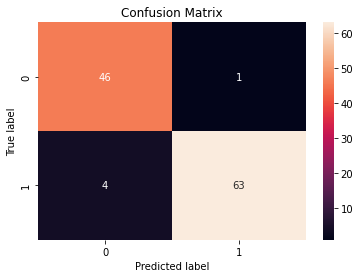

In [1182]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

Compute the ROC curve and plot

In [1183]:
# Find probability
y_proba = grid_search.predict_proba(X_test)[:, 1]
false_positive, true_positive, thresholds = roc_curve(y_test, y_proba)

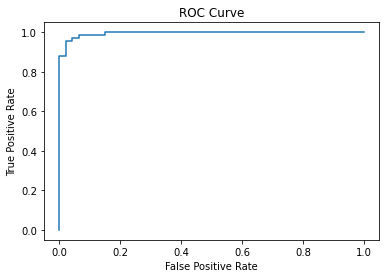

In [1184]:
# Plot ROC curve
plt.plot(false_positive, true_positive)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [1185]:
predictions = grid_search.predict_proba(X_test)[:, 1]

Compute auc score

In [1186]:
# Compute auc
auc = roc_auc_score(y_test, predictions)
print(auc)

0.9946014607812004


Plot AUC-ROC curve

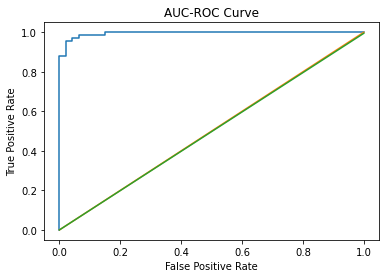

In [1187]:
# Plot AUC-ROC curve
plt.plot(false_positive, true_positive)
plt.plot([0, 1], [0, 1])
plt.plot([0, 1], [0, auc])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve")
plt.show()

Compute the precision-recall curve and plot

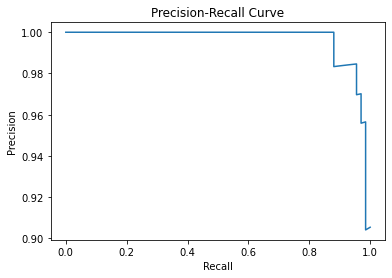

In [1188]:
# Compute the probabilities of the positives
y_proba = grid_search.predict_proba(X_test)[:,1]
# Compute the precision-recall curve
precision, recall, __ = precision_recall_curve(y_test, y_proba)
# Plot the curve
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

5-Fold Cross Validation

As we can see in the results,selecting different portion of the data affects the performance.

In [1189]:
# 5-Fold Cross validation
kf = KFold(n_splits=5)

# For loop to train and evaluate the model 
for train_index, evaluation_index in kf.split(X):
  # Training and evaluation data for this fold
  X_train, X_evaluation = X[train_index], X[evaluation_index]
  y_train, y_evaluation = y[train_index], y[evaluation_index]

  # Train the model
  log_model.fit(X_train, y_train)

  # Evaluate the model
  y_pred =  log_model.predict(X_evaluation)
  score =  log_model.score(X_evaluation, y_evaluation)

  # Print the evaluation score
  print(f"Score: {score:.4f}")

Score: 0.9123
Score: 0.9561
Score: 0.9649
Score: 0.9561
Score: 0.9558


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

### Question 2

Report your observations on how the performance is affected when the parameters change and **why.** So, pick parameters that you can explain the reason behind the effect on the performance.

**Your Answer:** 

### Question 3

Using confusion matrix, explain the performance of the model briefly.

**Your Answer:** In the confusion matrix, we can see that the model is performing well. The true positive and true negative rates are very high.

### Question 4

Examine the curves and explain the performance of the model briefly.

**Your Answer:** ROC is a curve that shows false positive rate and true positive rate. AUC is the area under the ROC. High AUC means data is well seperable. AUC is 0.99, so it is almost 1. That means This data is well seperable. In the precision-recall curve, it can be seen that we have both high precision and high recall. It means classifier works well.

### Apply another classifier that you have chosen
* Report the performance of the model with appropriate metrics (at least 4) on the test data.
* Plot confusion matrix of the predictions and actual values.
* Answer Question 5 and 6.

*You do not need to perform hyperparameter optimization for this section.*

I chose naive bayes classifier because given data it continuous. Classifier types like svm do not work with continuos data.

In [1190]:
# Apply gaussian naive bayes
clf = GaussianNB()
clf.fit(X_train, y_train)
# Make prediction
y_pred = clf.predict(X_test)

Precision= tp / (tp+fp).The precision score is high, so if the model classifies an element as positive, then it is likely that it is truly positive.

In [1191]:
# Compute precision score
precision = precision_score(y_test, y_pred)
precision

0.9538461538461539

Accuracy score is high so model classifies well.

In [1192]:
# Compute accuracy score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9298245614035088

Recall = tp/(tp+fn).Recall score is high, so model has high accuracy to classify positive values.

In [1193]:
# Compute recall score
recall = recall_score(y_test, y_pred)
recall

0.9253731343283582

AUC-ROC score is high. So area under ROC curve is close to 1. That means, data is well seperable.

In [1194]:
# Compute auc
auc_roc = roc_auc_score(y_test, y_pred)
auc_roc

0.9307716735471578

Plot confusion matrix

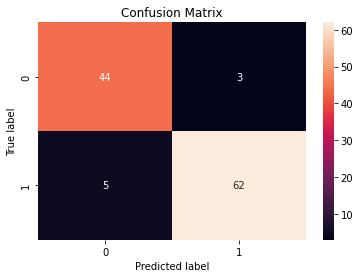

In [1195]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()

### Question 5
Using confusion matrix, explain the performance of the model briefly. Compare the performance of this model with logistic regression model.

**Your Answer:** If we compare it with logistic regression, we can say that it performs slightly worse, but still has a high accuracy rate.The true positive and true negative rates are high.

### Question 6

When does the "accuracy" metric fails to represent the success of our model so that we rely on other metrics? Think about possible scenarios and give a single example and explain briefly.

**Your Answer:** Let's say we have a dataset containing 100 people with cancer and 1 healthy person. If a model always predicts that a person has cancer, then it may appear successful based on metrics, but in reality, it is not a good model. This is because the model is not able to accurately predict whether a person is healthy or not. In order to have a successful model, it should be able to make accurate predictions for both healthy and unhealthy individuals.

## Clustering

*Recall: Clustering is an approach of unsupervised learning. In clustering, aim is to split the database into several clusters/groups in where there is no given information of classes. It can be used for anomaly detection, customer segmentation and so on.*

We will be using penguins data that you are familiar from the visualization recitation. Drop the rows that contain null value. You are going to only use following columns (attributes/features):

1. "bill_length_mm"
2. "bill_depth_mm"
3. "flipper_length_mm"
4. "body_mass_g"<br />and "species" (this feature will only be used to compare what we have found with clustering approach)

Load penguins dataset, drop unnecessary columns and the rows that contain null value.

In [1196]:
# Load data
penguins = load_penguins()
# Drop unnecessary columns
penguins = penguins.drop(columns=['island','sex','year'])
# Drop rows that contain null value
penguins = penguins.dropna()

### Apply K-Means

* Use the dataset with 4 columns as **"bill_length_mm",
"bill_depth_mm",
"flipper_length_mm" and
"body_mass_g".**
* Apply PCA and return 2 principal components. This is done for visualizing purposes. Since dataset does not contain numerous features, information loss due to PCA is negligible.

* Report sums of squared error between centroids and within the clusters (also called total inertia).
* Answer Question 7.

Map species with numerical values to avoid errors

In [1197]:
# Mapping with numerical values
penguins['species'] = penguins['species'].map({'Gentoo': 1, 'Adelie': 2, 'Chinstrap': 3})

Apply K-Means

In [1198]:
# Apply K-means
kmeans = KMeans(n_clusters=3)
kmeans.fit(penguins)
# Make prediction
labels = kmeans.predict(penguins)

Apply PCA and return 2 principal components(This is done for visualizing purposes). 

In [1199]:
# Apply PCA
pca = PCA(n_components=2)
pca.fit(penguins)
penguins_pca = pca.transform(penguins)

Sums of squared error between centroids and within the clusters(total inertia) is high, so in clusters there are points far from arithmetic mean of the clusters. 

In [1200]:
# Compute SSE
total_inertia = kmeans.inertia_
total_inertia

29178416.688844558

### Plot Clusters

* Cluster the resulting dataset into 3 groups. Plot the scatter graph. 
* Mark 1 sample that can be considered as outlier for each cluster in the graph with a different color.
* Answer Question 6.  

Create a scatter plot to visualize the clusters of penguin data.

In [1201]:
outliers = []
# Find outlier points
for i in range(3):
    points_in_cluster = penguins_pca[labels==i]
    reference_point = np.mean(points_in_cluster,axis=0)
    distances = []
    for i in points_in_cluster:
        distances.append(np.linalg.norm((points_in_cluster - reference_point), axis=1))
    outliers.append(points_in_cluster[np.argmax(distances)])

Plot Outliers (reference points are the first elements of each cluster).

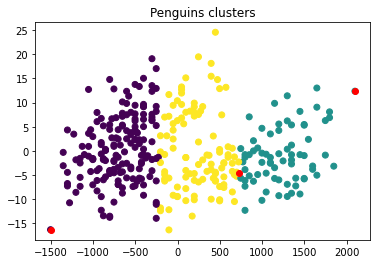

In [1202]:
# Plot 2d penguins data
plt.scatter(penguins_pca[:,0], penguins_pca[:,1], c=labels)
for i in outliers:
    # Plot outliers
    plt.scatter(i[0], i[1], c="red")
plt.title("Penguins clusters")
plt.show()

### Question 7

Examine clusters and report what do samples in same cluster have in common? Does your clustering algorithm split the data according to the species?

In [1205]:
cluster1 = penguins[labels == 0]
cluster2 = penguins[labels == 1]
cluster3 = penguins[labels == 2]

I calculated std/ mean to see ho

In [1213]:
cluster1

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,2,39.1,18.7,181.0,3750.0
1,2,39.5,17.4,186.0,3800.0
2,2,40.3,18.0,195.0,3250.0
4,2,36.7,19.3,193.0,3450.0
5,2,39.3,20.6,190.0,3650.0
...,...,...,...,...,...
337,3,46.8,16.5,189.0,3650.0
338,3,45.7,17.0,195.0,3650.0
340,3,43.5,18.1,202.0,3400.0
341,3,49.6,18.2,193.0,3775.0


In [1206]:
cluster1.std()/cluster1.mean()

species              0.206358
bill_length_mm       0.130434
bill_depth_mm        0.063374
flipper_length_mm    0.034653
body_mass_g          0.083278
dtype: float64

In [1207]:
cluster2.std()/cluster2.mean()

species              0.000000
bill_length_mm       0.060800
bill_depth_mm        0.056477
flipper_length_mm    0.027024
body_mass_g          0.058634
dtype: float64

In [1209]:
cluster3.std()/cluster3.mean()

species              0.436485
bill_length_mm       0.089849
bill_depth_mm        0.156906
flipper_length_mm    0.045317
body_mass_g          0.062003
dtype: float64

In [1210]:
cluster1["species"].mean()

2.309090909090909

In [1211]:
cluster2["species"].mean()

1.0

In [1212]:
cluster3["species"].mean()

1.6635514018691588

In [ ]:
cluster2

**Your Answer:** Yes, the algorithm is doing clustering based on the species (we can see this by examining the means of the species columns of the clusters). In order to find the common characteristics of the samples in the same cluster, I divided the standard deviations by the means.We can say that the attributes with small results are common among samples within the same cluster. All the attributes (bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g) had small results, but the smallest was flipper_length_mm.

### Evaluating Clusters

* Report SSE (Sums of squared error, or inertia). Answer Question 8. 

*Hint: You may play with the k parameter to see how inertia changes and that may help you to answer the question.*



There are 342 rows in dataset.If we have 342 clusters, then inertia equals zero.

In [ ]:
# Apply K-means with n clusters
kmeans = KMeans(n_clusters=342)
kmeans.fit(penguins)
# Compute inertia
kmeans.inertia_

### Question 8

If SSE is 0, would you call the clustering successful? In which scenario SSE could be 0?

**Your Answer:** If SSE is equal to zero, there are as many identical groups as the number of clusters. For example, suppose we have 3 identical birds, 2 identical cats and 4 identical dogs and 3 clusters, then SSE equals zero. Or suppose we have 10 different dogs and 10 clusters. In this case too, the SSE is zero. If SSE is zero, we cannot say that clustering is successful because clustering is the process of clustering based on the similarity of features. If they're identical, clustering doesn't make any sense.

I observed that when the number of clusters is equal to the number of rows in this data, the inertia of the k-means algorithm becomes zero.